<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Phase2/Session2/Copy_of_EVA_P2S2_File_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from keras.datasets import reuters
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 512

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [0]:

y_test.shape

(2246, 46)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)




Train on 6287 samples, validate on 2695 samples
Epoch 1/10





6287/6287 [==============================] - 20s 3ms/step - loss: 0.0838 - acc: 0.9784 - val_loss: 0.0748 - val_acc: 0.9783
Epoch 2/10
6287/6287 [==============================] - 10s 2ms/step - loss: 0.0700 - acc: 0.9801 - val_loss: 0.0703 - val_acc: 0.9801
Epoch 3/10
6287/6287 [==============================] - 9s 1ms/step - loss: 0.0602 - acc: 0.9832 - val_loss: 0.0710 - val_acc: 0.9805
Epoch 4/10
6287/6287 [==============================] - 9s 1ms/step - loss: 0.0499 - acc: 0.9866 - val_loss: 0.0712 - val_acc: 0.9805
Epoch 5/10
6287/6287 [==============================] - 9s 1ms/step - loss: 0.0404 - acc: 0.9890 - val_loss: 0.0736 - val_acc: 0.9789
Epoch 6/10
6287/6287 [==============================] - 9s 2ms/step - loss: 0.0336 - acc: 0.9903 - val_loss: 0.0744 - val_acc: 0.9799
Epoch 7/10
6287/6287 [==============================] - 10s 2ms/step - loss: 0.0282 - acc: 0.9917 - val_loss: 0.0771 - val_acc: 0.9798
Epo

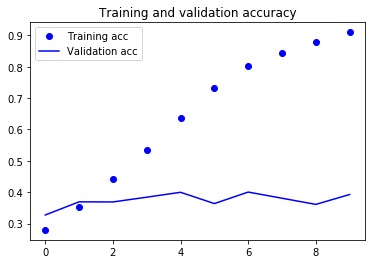

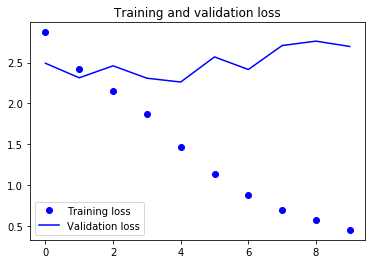

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()